# Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings 
from collections import Counter
warnings.filterwarnings('ignore')

In [2]:
raw_df = pd.read_csv('creditcard.csv')
raw_df.shape

(284807, 31)

# Exploratory Data Analysis (EDA)

In [3]:
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [28]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
raw_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Data Distribution

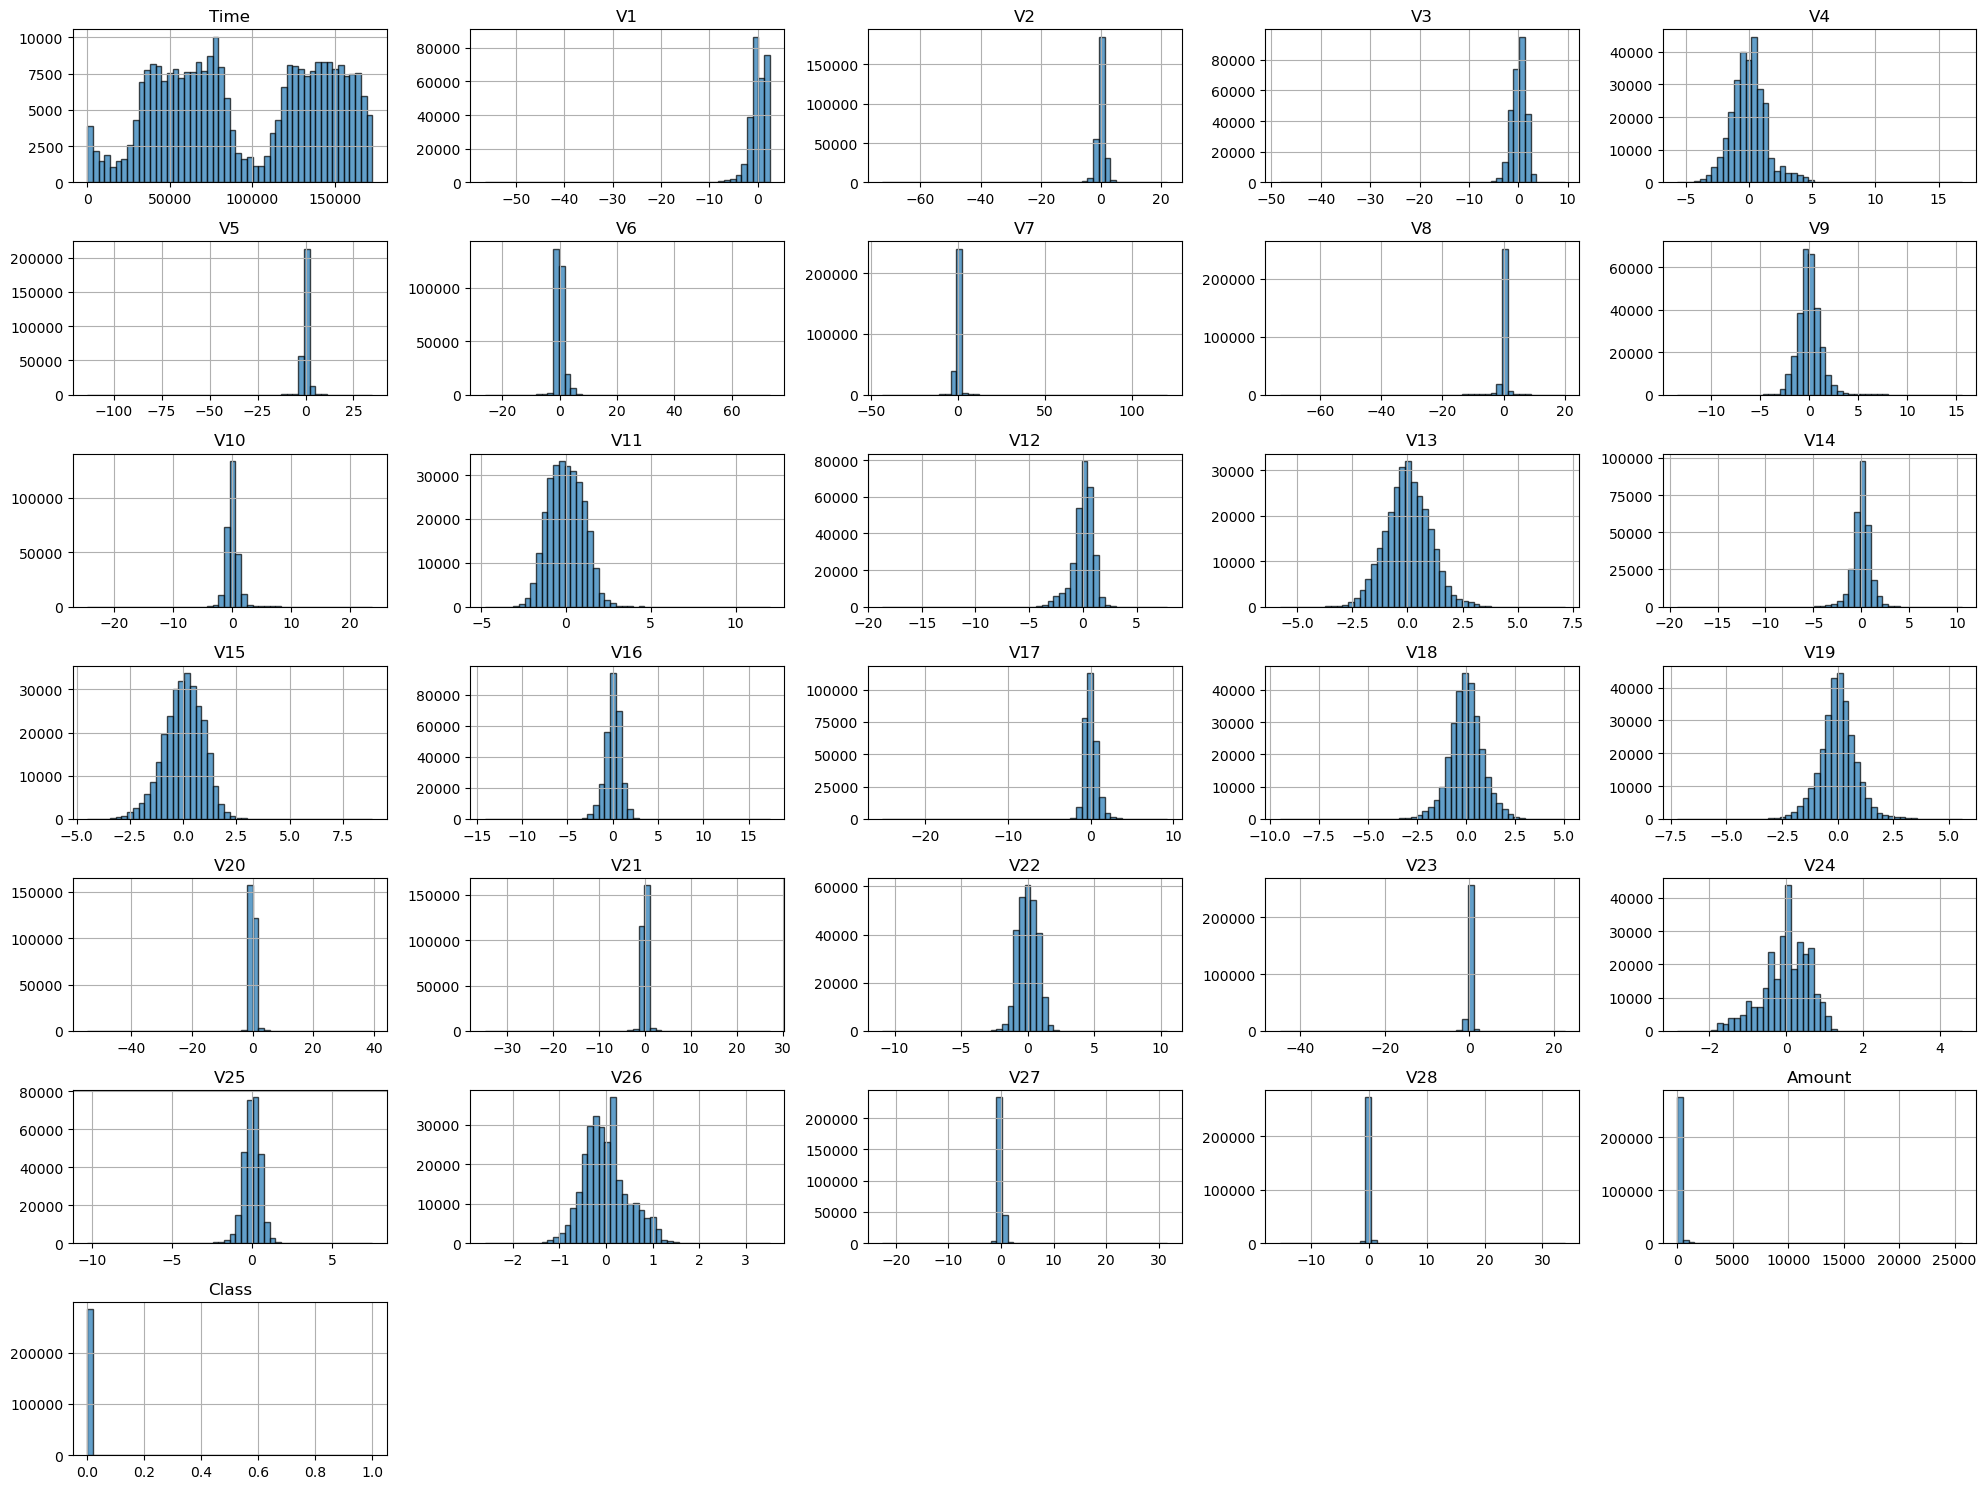

In [6]:
import matplotlib.pyplot as plt

# Define number of rows and columns for subplots
num_features = raw_df.shape[1]  # Assuming all columns are numeric
num_cols = 5  # Number of columns in the subplot grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Adjust rows accordingly

plt.figure(figsize=(20, 15))  # Adjust figure size

# Plot each histogram
for i, column in enumerate(raw_df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    raw_df[column].hist(bins=50, edgecolor='black', alpha=0.7)
    plt.title(column, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


## Comparing Genuine vs Fraud Transaction

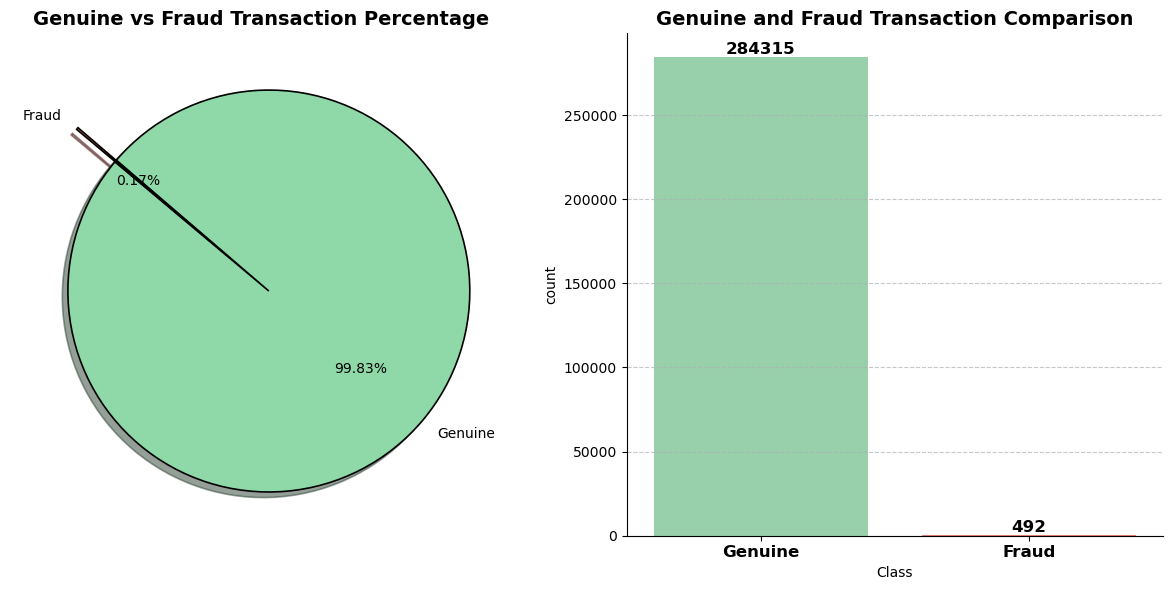

In [7]:
tmp = raw_df.Class.value_counts()
pie_val = [tmp[0] / sum(tmp) * 100, tmp[1] / sum(tmp) * 100]

plt.figure(figsize=(12, 6))

# Pie Chart with new colors and slight changes
plt.subplot(1, 2, 1)
plt.pie(pie_val, labels=['Genuine', 'Fraud'], 
        autopct='%1.2f%%', 
        startangle=140, 
        explode=(0.05, 0.2),  # Different explode effect
        colors=['#8fd9a8', '#ff6f61'],  # Changed color scheme
        shadow=True,  # Added shadow effect
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.2})
plt.title('Genuine vs Fraud Transaction Percentage', fontsize=14, fontweight='bold')

# Countplot with different style
plt.subplot(1, 2, 2)
ax = sns.countplot(data=raw_df, x='Class', palette=['#8fd9a8', '#ff6f61'])
for i in ax.containers:
    ax.bar_label(i, fmt='%d', fontsize=12, fontweight='bold')  # Customized bar labels
ax.set_xticklabels(['Genuine', 'Fraud'], fontsize=12, fontweight='bold')
ax.spines['top'].set_visible(False)  # Removed top spine
ax.spines['right'].set_visible(False)  # Removed right spine
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added light gridlines
plt.title('Genuine and Fraud Transaction Comparison', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

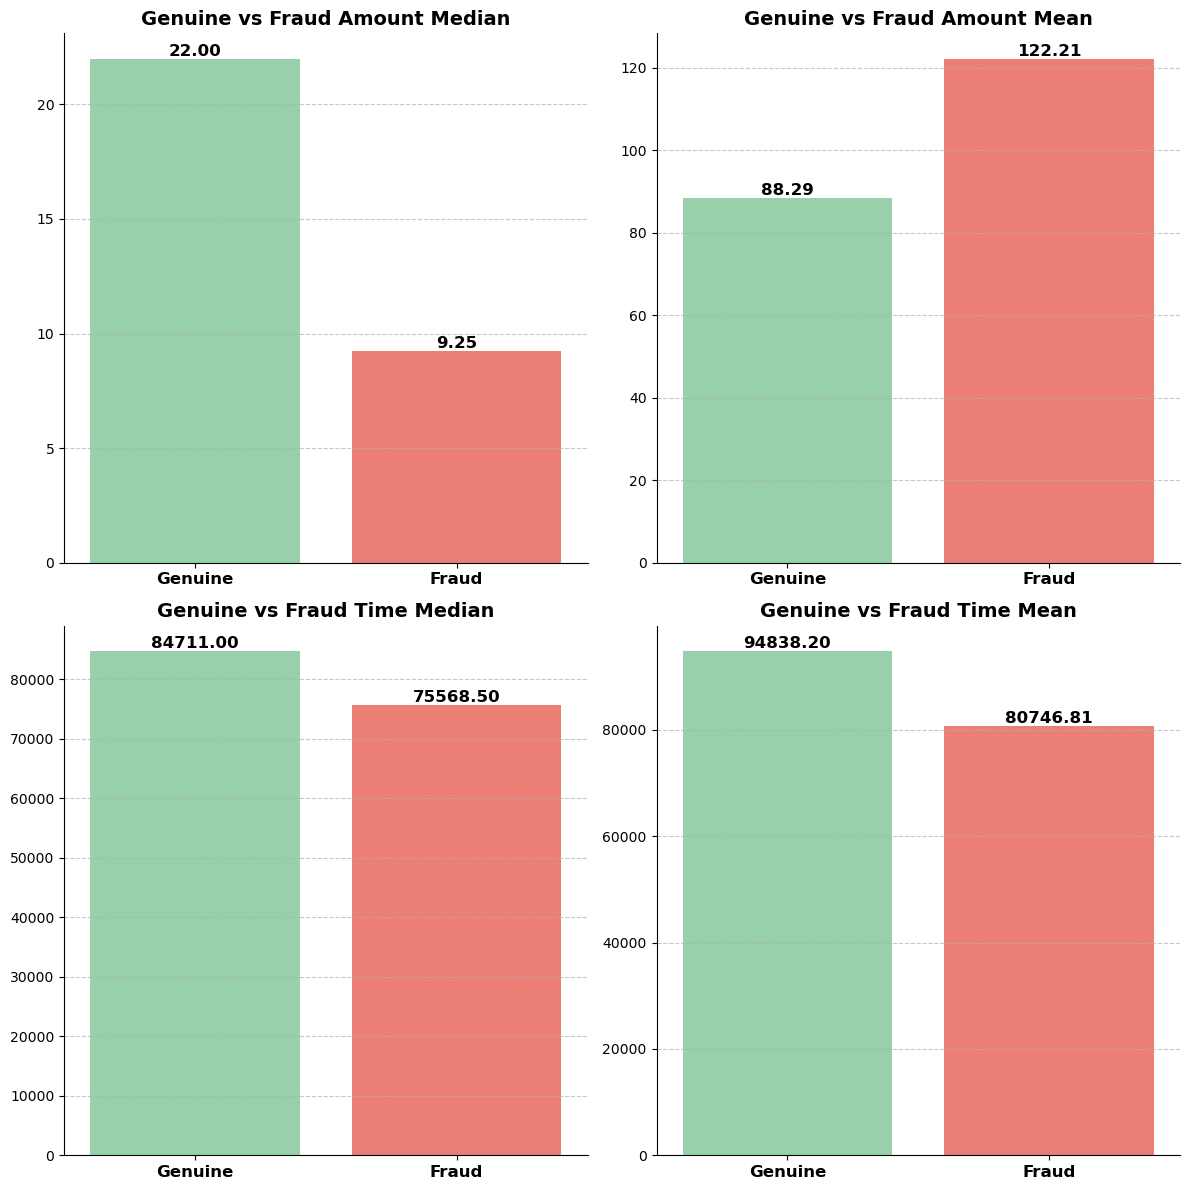

In [8]:
plt.figure(figsize=(12, 12))

# Median Amount Plot
tmp = raw_df.groupby('Class')['Amount'].median().to_dict()
plt.subplot(2, 2, 1)
ax = sns.barplot(x=list(tmp.keys()),
                 y=list(tmp.values()),
                 palette=['#8fd9a8', '#ff6f61'])  # New color scheme
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', fontsize=12, fontweight='bold')
ax.set_xticklabels(['Genuine', 'Fraud'], fontsize=12, fontweight='bold')
ax.set_title('Genuine vs Fraud Amount Median', fontsize=14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mean Amount Plot
tmp = raw_df.groupby('Class')['Amount'].mean().to_dict()
plt.subplot(2, 2, 2)
ax = sns.barplot(x=list(tmp.keys()),
                 y=list(tmp.values()),
                 palette=['#8fd9a8', '#ff6f61'])
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', fontsize=12, fontweight='bold')
ax.set_xticklabels(['Genuine', 'Fraud'], fontsize=12, fontweight='bold')
ax.set_title('Genuine vs Fraud Amount Mean', fontsize=14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Median Time Plot
tmp = raw_df.groupby('Class')['Time'].median().to_dict()
plt.subplot(2, 2, 3)
ax = sns.barplot(x=list(tmp.keys()),
                 y=list(tmp.values()),
                 palette=['#8fd9a8', '#ff6f61'])
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', fontsize=12, fontweight='bold')
ax.set_xticklabels(['Genuine', 'Fraud'], fontsize=12, fontweight='bold')
ax.set_title('Genuine vs Fraud Time Median', fontsize=14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mean Time Plot
tmp = raw_df.groupby('Class')['Time'].mean().to_dict()
plt.subplot(2, 2, 4)
ax = sns.barplot(x=list(tmp.keys()),
                 y=list(tmp.values()),
                 palette=['#8fd9a8', '#ff6f61'])
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', fontsize=12, fontweight='bold')
ax.set_xticklabels(['Genuine', 'Fraud'], fontsize=12, fontweight='bold')
ax.set_title('Genuine vs Fraud Time Mean', fontsize=14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Both Amount and Time have very significant mean and median differences due to influence of outliers

### Feature Correlation

<AxesSubplot:>

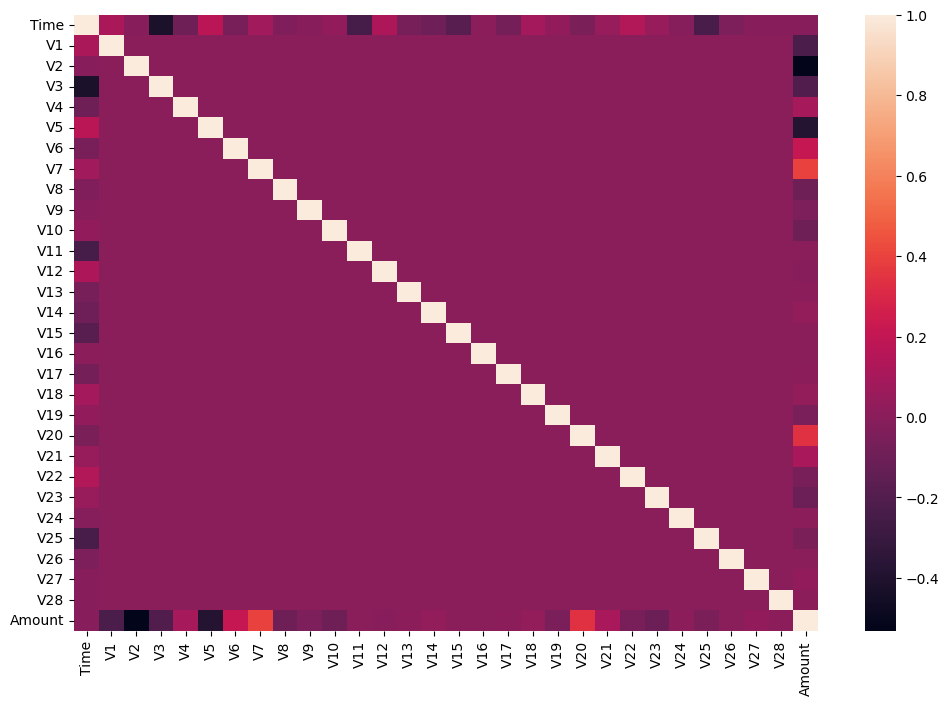

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(raw_df.drop('Class', axis=1).corr())

Amount and Time have a weak to moderate correlation with some of the features in the data set.

## Checking Outlier Data

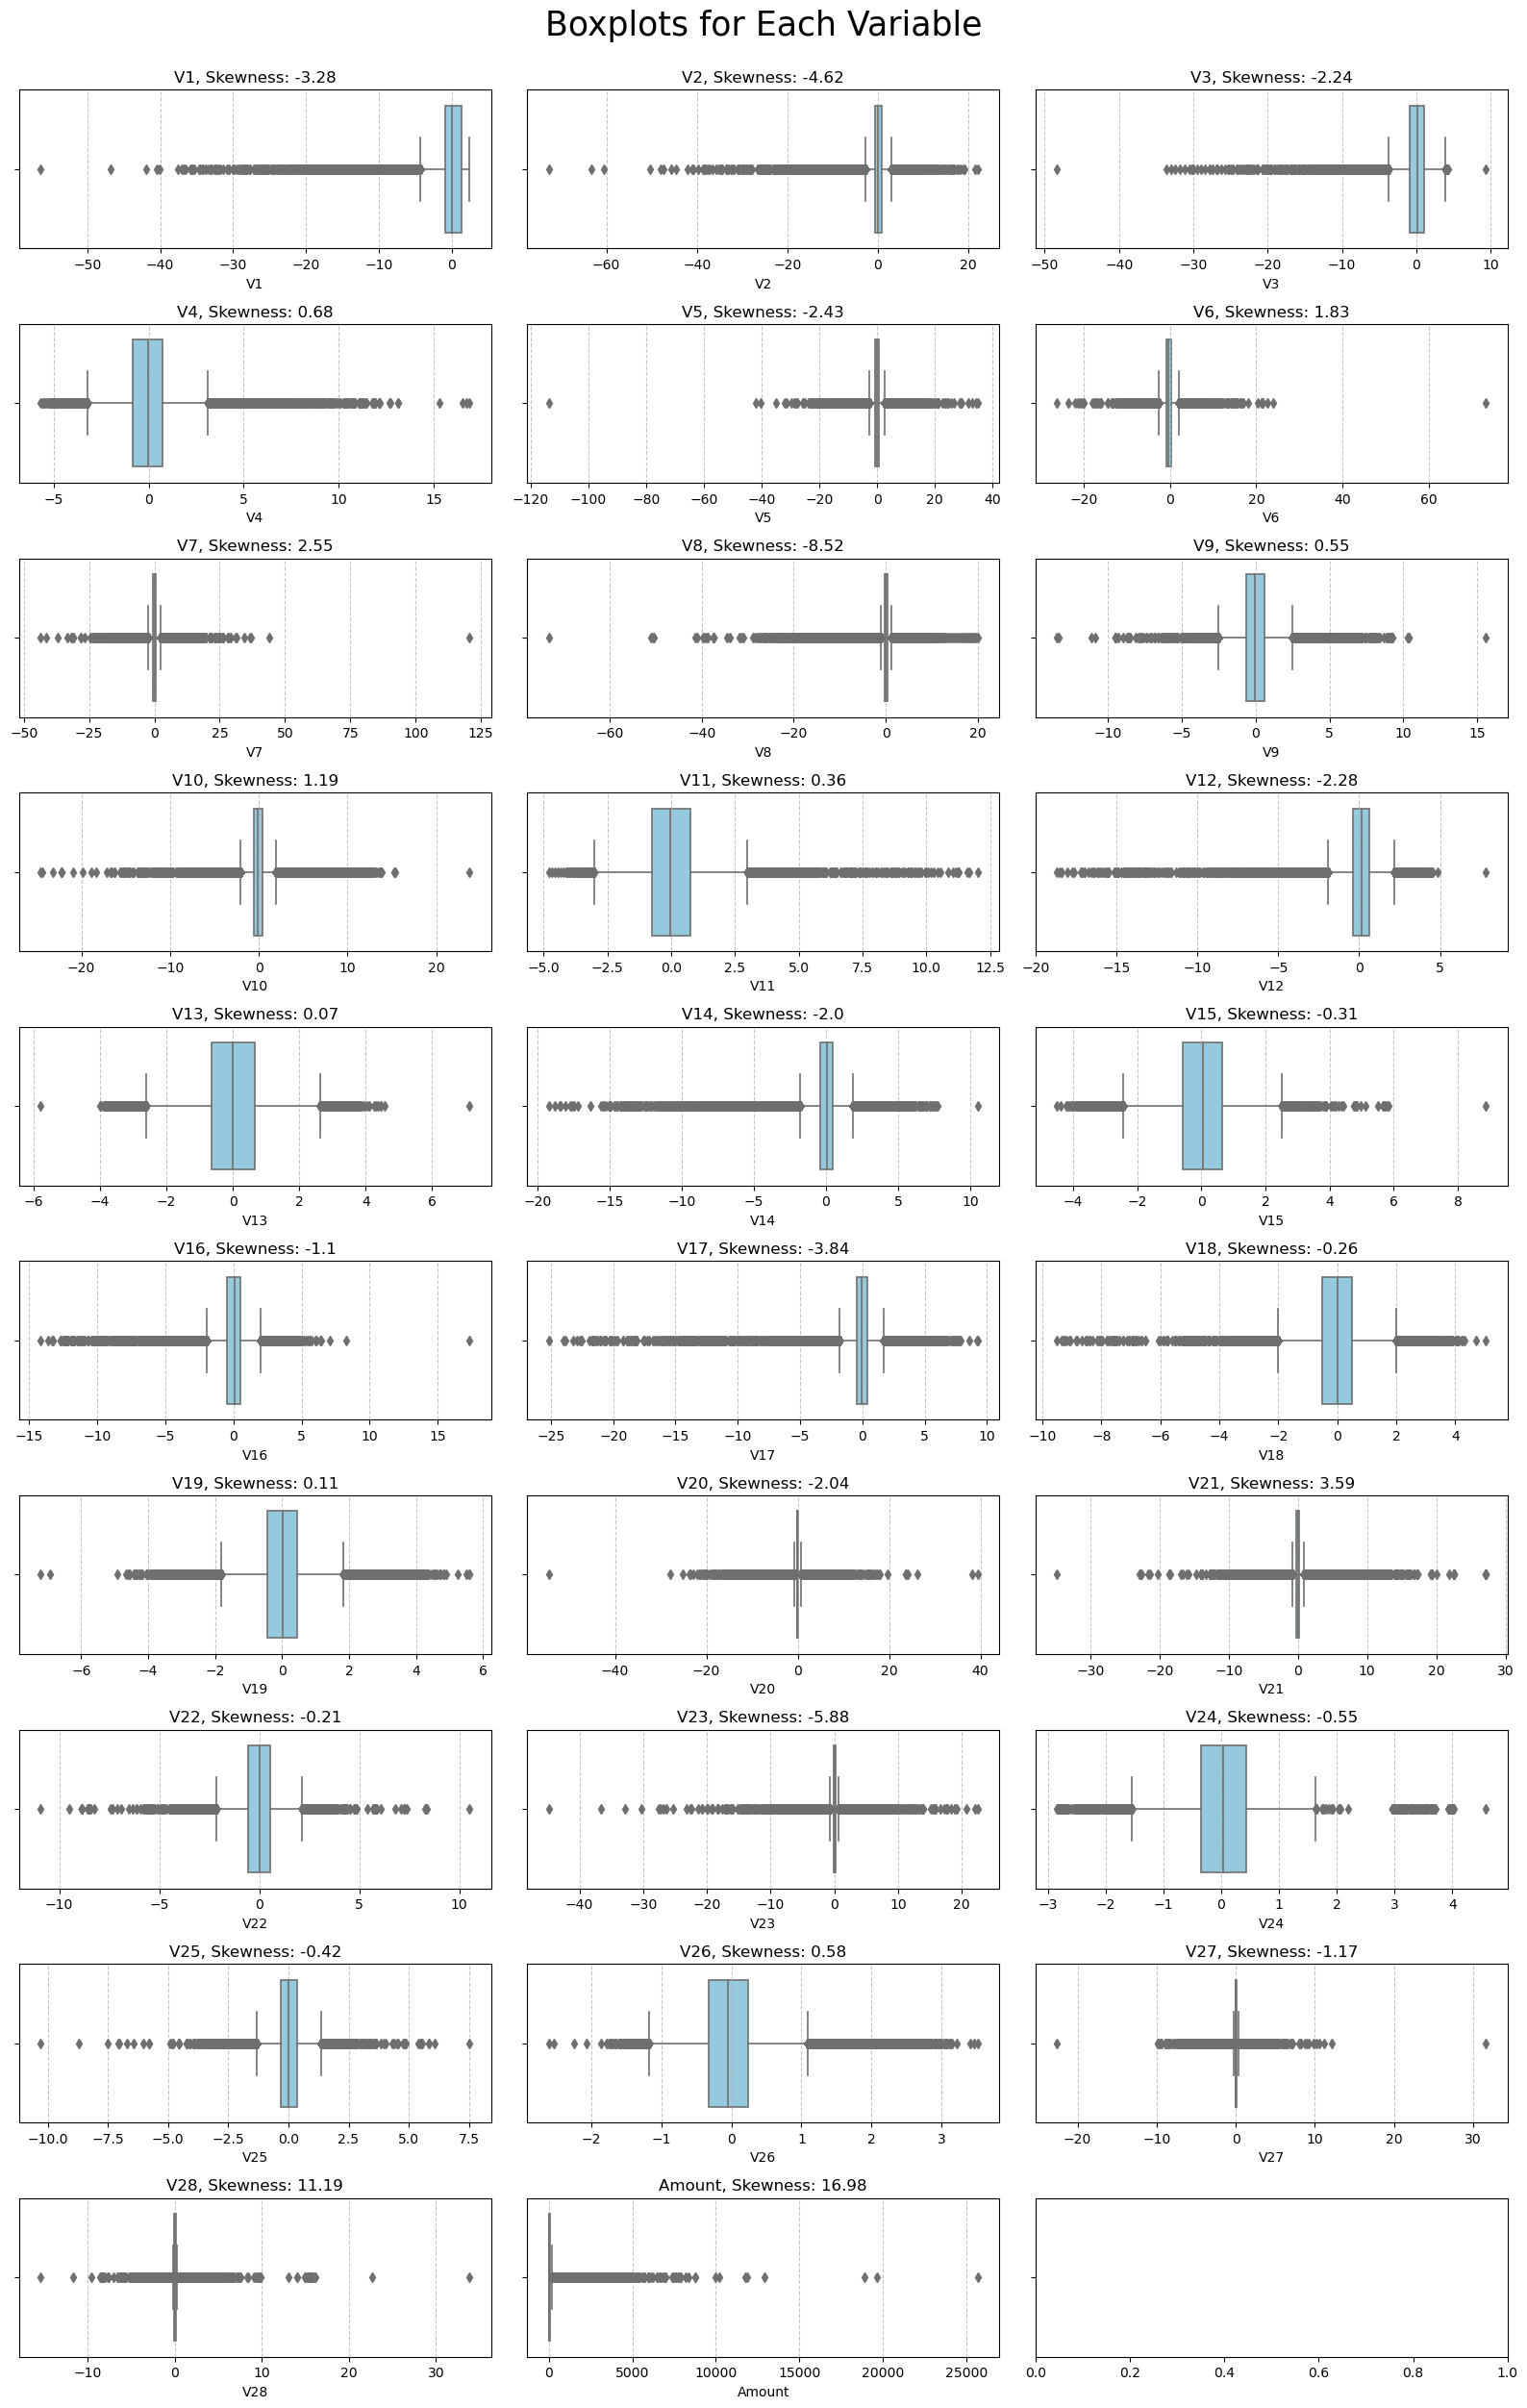

In [10]:
# Selecting only numeric features
numeric_features = raw_df.loc[:, 'V1':'Amount'].columns.tolist()

# Function to plot boxplots with customized style
def plot_boxplots(data, features, rows, cols, title):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 25), sharey=True)
    fig.suptitle(title, fontsize=25, y=1)
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        sns.boxplot(x=data[feature], ax=axes[i], orient='h', color='skyblue', linewidth=1.2)
        axes[i].set_title(f"{feature}, Skewness: {round(data[feature].skew(), 2)}", fontsize=12)
        axes[i].grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Calling function with dataset
plot_boxplots(data=raw_df, features=numeric_features, rows=10, cols=3, title='Boxplots for Each Variable')

There are a lot of outliers from each features. Handling the outliers using Inter Quartile Range (IQR) method. 

#### Removing Outlier with IQR

In [12]:
def IQR_method (df,min_outliers,features):
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > min_outliers )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [13]:
numeric_columns = (list(raw_df.loc[:, 'Time':'Amount']))

iqr_outliers = IQR_method(raw_df,1,numeric_columns)
raw_df2 = raw_df.drop(iqr_outliers, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 31904


In [14]:
raw_df2.Class.value_counts()

0    203351
1        26
Name: Class, dtype: int64

Too much missing value, back using non-removed outlier data set

In [15]:
del raw_df2

# Preprocessing Data

## Drop Unused Feature

In [16]:
# raw_df.drop('Time',axis=1, inplace=True)

## Split Data

In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [18]:
X = raw_df.drop('Class', axis=1)
y = raw_df['Class']

X_train_cv = []
X_test_cv = []
y_train_cv = []
y_test_cv = []
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train_cv.append(X.loc[train_index,:])
    X_test_cv.append(X.loc[test_index,:])
    y_train_cv.append(y.loc[train_index])
    y_test_cv.append(y.loc[test_index])

In [19]:
print(y_train_cv[0].value_counts())
print(y_test_cv[0].value_counts())

0    227452
1       393
Name: Class, dtype: int64
0    56863
1       99
Name: Class, dtype: int64


In [20]:
from sklearn.preprocessing import StandardScaler

## Scale Data

In [21]:
scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns, index=X_train.index)
# X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns, index=X_test.index)

# raw_df[["Amount"]] = scaler.fit_transform(raw_df[["Amount"]])
# raw_df[["Time"]] = scaler.fit_transform(raw_df[["Time"]])

# Transforming the test data
# X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])
# X_test[["Time"]] = scaler.transform(X_test[["Time"]])

for i in range(len(X_train_cv)):
    X_train_cv[i][["Amount","Time"]] = scaler.fit_transform(X_train_cv[i][["Amount","Time"]])
    X_test_cv[i][["Amount","Time"]] = scaler.transform(X_test_cv[i][["Amount","Time"]])

# Model Training

In [22]:
import time
import numpy
from sklearn.metrics import classification_report, precision_recall_curve, f1_score, auc, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

### Logistic Regression

fold #1
training time 2.425557851791382
f1 score: 0.7231638418079097
fold #2
training time 2.4500861167907715
f1 score: 0.7228915662650603
fold #3
training time 2.507122039794922
f1 score: 0.7218934911242604
fold #4
training time 2.4785075187683105
f1 score: 0.7239263803680982
fold #5
training time 2.8986775875091553
f1 score: 0.7529411764705882

Avg. Training time: 2.5731571435928347
Avg. F1-Score Positive class: 0.7289632912071834


Text(0.5, 1.0, 'Precision-Recall Curve for Positive Class')

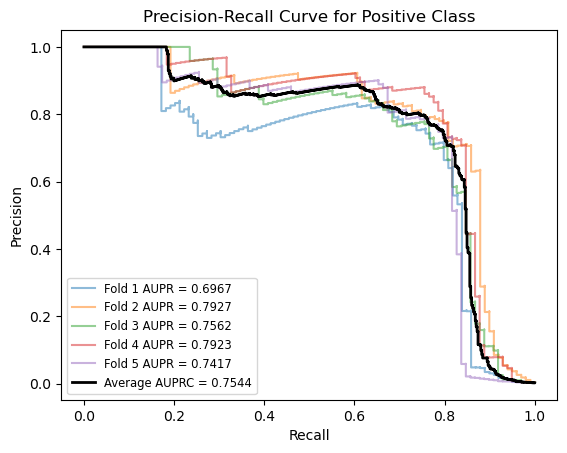

In [23]:
logr = LogisticRegression(random_state=1)

axes = plt.subplot()
y_real = []
y_proba = []
f1_list = []
# auc_list = []
time_list = []
for i in range(len(X_train_cv)):
    print(f'fold #{i+1}')
    start_time = time.time()
    logr.fit(X_train_cv[i],y_train_cv[i])
    elapsed_time = time.time() - start_time
    print(f'training time {elapsed_time}')
    time_list.append(elapsed_time)
    y_probs = logr.predict_proba(X_test_cv[i])
    # probabilities for the positive outcome only
    y_probs = y_probs[:, 1]
    # predict class values
    yhat = logr.predict(X_test_cv[i])
    f_score = f1_score(y_test_cv[i], yhat)
    f1_list.append(f_score)
    print('f1 score:',f_score)
    time_list.append(time.time() - start_time)
    # print(classification_report(y_test_cv[i],yhat))
    res_precision, res_recall, _ = precision_recall_curve(y_test_cv[i], y_probs)
    aupr = average_precision_score(y_test_cv[i], y_probs)
    lab = 'Fold %d AUPR = %.4f' % (i+1, aupr)
    axes.step(res_recall, res_precision, label=lab, alpha=0.5)
    # y_real.append(y_test_cv[i])
    y_proba.append(y_probs)

print()
print('Avg. Training time:',sum(time_list)/len(time_list))
print('Avg. F1-Score Positive class:',sum(f1_list)/len(f1_list))

y_real = numpy.concatenate(y_test_cv)
y_proba = numpy.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
lab = 'Average AUPRC = %.4f' % (average_precision_score(y_real, y_proba))
axes.step(recall, precision, label=lab, lw=2, color='black')
axes.set_xlabel('Recall')
axes.set_ylabel('Precision')
axes.legend(loc='lower left', fontsize='small')
axes.set_title('Precision-Recall Curve for Positive Class')

### Random Forest

fold #1
training time 245.69739532470703
f1 score: 0.8397790055248618
fold #2
training time 249.87177348136902
f1 score: 0.8791208791208791
fold #3
training time 260.93872332572937
f1 score: 0.839080459770115
fold #4
training time 248.92533135414124
f1 score: 0.871508379888268
fold #5
training time 240.10160899162292
f1 score: 0.8651685393258427

Avg. Training time: 249.98675148487092
Avg. F1-Score Positive class: 0.8589314527259934


Text(0.5, 1.0, 'Precision-Recall Curve for Positive Class')

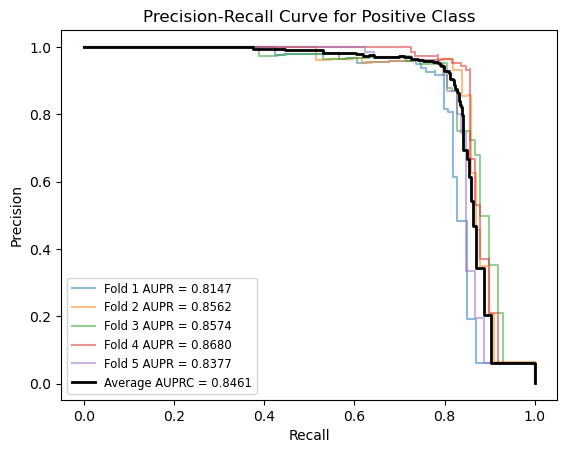

In [24]:
rfc = RandomForestClassifier(n_estimators=100,random_state=1)

axes = plt.subplot()
y_real = []
y_proba = []
f1_list = []
# auc_list = []
time_list = []
for i in range(len(X_train_cv)):
    print(f'fold #{i+1}')
    start_time = time.time()
    rfc.fit(X_train_cv[i],y_train_cv[i])
    elapsed_time = time.time() - start_time
    print(f'training time {elapsed_time}')
    time_list.append(elapsed_time)
    y_probs = rfc.predict_proba(X_test_cv[i])
    # probabilities for the positive outcome only
    y_probs = y_probs[:, 1]
    # predict class values
    yhat = rfc.predict(X_test_cv[i])
    f_score = f1_score(y_test_cv[i], yhat)
    f1_list.append(f_score)
    print('f1 score:',f_score)
    time_list.append(time.time() - start_time)
    # print(classification_report(y_test_cv[i],yhat))
    res_precision, res_recall, _ = precision_recall_curve(y_test_cv[i], y_probs)
    aupr = average_precision_score(y_test_cv[i], y_probs)
    lab = 'Fold %d AUPR = %.4f' % (i+1, aupr)
    axes.step(res_recall, res_precision, label=lab, alpha=0.5)
    # y_real.append(y_test_cv[i])
    y_proba.append(y_probs)

print()
print('Avg. Training time:',sum(time_list)/len(time_list))
print('Avg. F1-Score Positive class:',sum(f1_list)/len(f1_list))

y_real = numpy.concatenate(y_test_cv)
y_proba = numpy.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
lab = 'Average AUPRC = %.4f' % (average_precision_score(y_real, y_proba))
axes.step(recall, precision, label=lab, lw=2, color='black')
axes.set_xlabel('Recall')
axes.set_ylabel('Precision')
axes.legend(loc='lower left', fontsize='small')
axes.set_title('Precision-Recall Curve for Positive Class')

### KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

fold #1
training time 0.027045011520385742
f1 score: 0.7978142076502732
fold #2
training time 0.026230812072753906
f1 score: 0.8465608465608466
fold #3
training time 0.04394102096557617
f1 score: 0.8135593220338984
fold #4
training time 0.050276756286621094
f1 score: 0.8304093567251463
fold #5
training time 0.04555153846740723
f1 score: 0.8087431693989071

Avg. Training time: 315.56766855716705
Avg. F1-Score Positive class: 0.8194173804738142


Text(0.5, 1.0, 'Precision-Recall Curve for Positive Class')

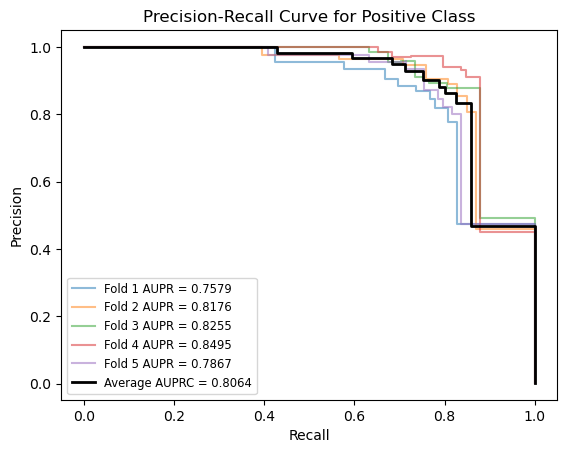

In [26]:
knn = KNeighborsClassifier(n_neighbors=9)

axes = plt.subplot()
y_real = []
y_proba = []
f1_list = []
# auc_list = []
time_list = []
for i in range(len(X_train_cv)):
    print(f'fold #{i+1}')
    start_time = time.time()
    knn.fit(X_train_cv[i],y_train_cv[i])
    elapsed_time = time.time() - start_time
    print(f'training time {elapsed_time}')
    time_list.append(elapsed_time)
    y_probs = knn.predict_proba(X_test_cv[i])
    # probabilities for the positive outcome only
    y_probs = y_probs[:, 1]
    # predict class values
    yhat = knn.predict(X_test_cv[i])
    f_score = f1_score(y_test_cv[i], yhat)
    f1_list.append(f_score)
    print('f1 score:',f_score)
    time_list.append(time.time() - start_time)
    # print(classification_report(y_test_cv[i],yhat))
    res_precision, res_recall, _ = precision_recall_curve(y_test_cv[i], y_probs)
    aupr = average_precision_score(y_test_cv[i], y_probs)
    lab = 'Fold %d AUPR = %.4f' % (i+1, aupr)
    axes.step(res_recall, res_precision, label=lab, alpha=0.5)
    # y_real.append(y_test_cv[i])
    y_proba.append(y_probs)

print()
print('Avg. Training time:',sum(time_list)/len(time_list))
print('Avg. F1-Score Positive class:',sum(f1_list)/len(f1_list))

y_real = numpy.concatenate(y_test_cv)
y_proba = numpy.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
lab = 'Average AUPRC = %.4f' % (average_precision_score(y_real, y_proba))
axes.step(recall, precision, label=lab, lw=2, color='black')
axes.set_xlabel('Recall')
axes.set_ylabel('Precision')
axes.legend(loc='lower left', fontsize='small')
axes.set_title('Precision-Recall Curve for Positive Class')

# Conclusion

Based on the evaluation results with Area Under Precision-Recall Curve of the three models above, Random Forest Classifier is the most optimum model with an average AUPRC value 0.8461 and F1-score 0.8589.